In [ ]:
import pandas as pd
import numpy as np

LOAD THE DATASET

In [ ]:
ls

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pwd

In [ ]:
!unzip 'SLR DATASET.zip'

unzip:  cannot find or open SLR DATASET.zip, SLR DATASET.zip.zip or SLR DATASET.zip.ZIP.


Data preprossing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Train_data=ImageDataGenerator(rescale=1./255,horizontal_flip= True,vertical_flip= True,zoom_range=0.2)

In [ ]:
Test_data=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train=Train_data.flow_from_directory(r"/content/drive/MyDrive/slrdataset/isl_data_grey_split/train",target_size=(100,100),
                                       class_mode="categorical",batch_size=300, color_mode='grayscale')

Found 12976 images belonging to 36 classes.


In [ ]:
x_test=Test_data.flow_from_directory(r"/content/drive/MyDrive/slrdataset/isl_data_grey_split/test",target_size=(100,100),
                                       class_mode="categorical",batch_size=300,color_mode='grayscale')

Found 4872 images belonging to 36 classes.


In [ ]:
len(x_train)

44

In [ ]:
len(x_test)

17

In [ ]:
x_train.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'a': 10,
 'b': 11,
 'c': 12,
 'd': 13,
 'e': 14,
 'f': 15,
 'g': 16,
 'h': 17,
 'i': 18,
 'j': 19,
 'k': 20,
 'l': 21,
 'm': 22,
 'n': 23,
 'o': 24,
 'p': 25,
 'q': 26,
 'r': 27,
 's': 28,
 't': 29,
 'u': 30,
 'v': 31,
 'w': 32,
 'x': 33,
 'y': 34,
 'z': 35}

In [ ]:
x_test.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'a': 10,
 'b': 11,
 'c': 12,
 'd': 13,
 'e': 14,
 'f': 15,
 'g': 16,
 'h': 17,
 'i': 18,
 'j': 19,
 'k': 20,
 'l': 21,
 'm': 22,
 'n': 23,
 'o': 24,
 'p': 25,
 'q': 26,
 'r': 27,
 's': 28,
 't': 29,
 'u': 30,
 'v': 31,
 'w': 32,
 'x': 33,
 'y': 34,
 'z': 35}

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

Model Building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers.legacy import Adam

In [ ]:
#Creating the model
model=Sequential()

In [ ]:
#Adding the layers
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(100,100,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten(input_shape=(32,32,3)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 76832)             0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#adding hidden layers
model.add(Dense(512, activation='relu'))
model.add(Dense(36, activation='relu'))

In [ ]:
#Adding the output layer
model.add(Dense(36, activation='softmax'))

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
len(x_train)

44

In [ ]:
len(x_test)

17

In [ ]:
### model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)
# Fitting the Model Generator
model.fit(x_train, steps_per_epoch=len(x_train),epochs=10, validation_data=x_test, validation_steps=len(x_test) )
#model.fit(x_train, epochs=100, verbose=1)

In [ ]:
model.save('/content/drive/MyDrive/slrdataset/slr.h5')

Test the model

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
Model = load_model('/content/drive/MyDrive/slrdataset/slr.h5')

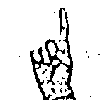

In [ ]:
img = image.load_img('/content/drive/MyDrive/slrdataset/isl_data_grey_split/test/1/109.png',target_size = (100,100))
img

In [ ]:
from skimage.transform import resize
def detect(frame):
    img=image.img_to_array(frame)
    img = resize(img,(100,100,1))
    img = np.expand_dims(img,axis=0)
    pred=np.argmax(model.predict(img))
    op=['0','1','2','3','4','5','6','7','8','9','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
    print("THE PREDICTED LETTER IS ",op[pred])

In [ ]:
img=image.load_img('/content/drive/MyDrive/slrdataset/isl_data_grey_split/test/c/109.png',target_size=(100,100))
detect(img)

1/1 [==============================] - 0s 210ms/step
THE PREDICTED LETTER IS  v


In [ ]:
img=image.load_img('/content/drive/MyDrive/slrdataset/isl_data_grey_split/test/b/138.png',target_size=(100,100))
detect(img)

1/1 [==============================] - 0s 58ms/step
THE PREDICTED LETTER IS  v


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from skimage.transform import resize
import xml.etree.ElementTree as ET
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')

# Load the pre-trained model
model_path = '/content/drive/MyDrive/slrdataset/slr.h5'  # Replace with your actual model path
model = load_model(model_path)

# Define a function to make predictions
def detect(frame):
    img = image.img_to_array(frame)
    img = resize(img, (100, 100, 1))
    img = np.expand_dims(img, axis=0)
    pred = np.argmax(model.predict(img))
    op = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
    return op[pred]

# Make predictions and store them in a list
predictions = []
image_paths = [
    '/content/drive/MyDrive/slrdataset/isl_data_grey_split/test/c/11.png','/content/drive/MyDrive/slrdataset/isl_data_grey_split/test/a/113.png',
    '/content/drive/MyDrive/slrdataset/isl_data_grey_split/test/b/108.png'
    # Add more image paths here
]

for image_path in image_paths:
    img = image.load_img(image_path, target_size=(100, 100))
    prediction = detect(img)
    predictions.append(prediction)

# Define the output XML file path
output_xml_path = '/content/drive/MyDrive/slrdatset/predictions.xml'

# Create an XML structure to save the predictions
root = ET.Element("predictions")
for idx, prediction in enumerate(predictions):
    letter = prediction
    prediction_elem = ET.SubElement(root, "prediction", index=str(idx), letter=letter)

# Create an ElementTree object and write it to the XML file
tree = ET.ElementTree(root)
tree.write('/content/drive/MyDrive/slrdataset/predictions.xml')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 38ms/step
